In [1]:
# Imports of general use
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# From .mp3 to .wav
from convert_mp3_to_wav import convert
# Music Loading
from music_loading import music_loading
# DWT
import pywt
import pywt.data
# Onset: SuperFlux 
from ODF_SuperFlux import ODF_SuperFlux
# PeDF
from PeDF import PeDF
from plot_PeDF import plot_PeDF
from plot_ODF import plot_ODF

In [ ]:
# Converte um arquivo que está na pasta do formato .mp3 para .wav

convert("120bpm_jazz.mp3")

Text(0.5, 1.0, 'Música')

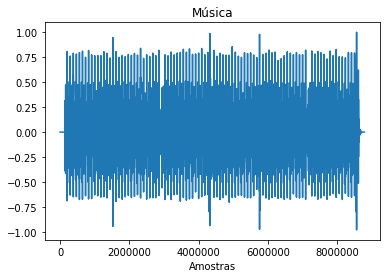

In [2]:
# Loading a file with desired sample_rate and down-mixed
# Returns a (n,1) numpy array

musica = music_loading("120bpm_jazz.wav", sample_rate=44100)

plt.figure()
plt.plot(musica)
plt.xlabel("Amostras")
plt.title("Música")

In [3]:
# Wavelet Decomposition

# Wavelet Filter Definition
coif3 = pywt.Wavelet('coif3')

# DWT of Music
coeffs = pywt.wavedec(musica, coif3, level = 5)
cA5, cD5, cD4, cD3, cD2, cD1 = coeffs

print("Infomações da decomposição wavelet")
for index in range(0,len(coeffs)):
    if index == 0:
        print("cA" + str(len(coeffs)-1) + " tem " + str(len(coeffs[index])) + " amostras.")
    else:
        print("cD" + str(len(coeffs)-index) + " tem " + str(len(coeffs[index])) + " amostas.")

Infomações da decomposição wavelet
cA5 tem 274448 amostras.
cD5 tem 274448 amostas.
cD4 tem 548879 amostas.
cD3 tem 1097742 amostas.
cD2 tem 2195468 amostas.
cD1 tem 4390920 amostas.


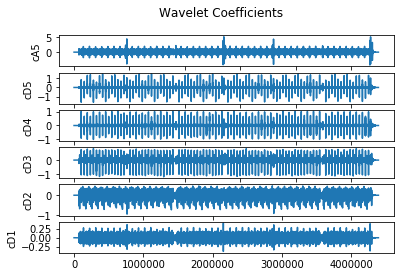

In [4]:
# Visualização dos Coefficientes Wavelet
fig, axs = plt.subplots(len(coeffs))
fig.suptitle('Wavelet Coefficients')
for index in range(0,len(coeffs)):
    axs[index].plot(coeffs[index])
    if index == 0:
        axs[index].set(ylabel = "cA" + str(len(coeffs)-1))
    else:
        axs[index].set(ylabel = "cD" + str(len(coeffs)-index))

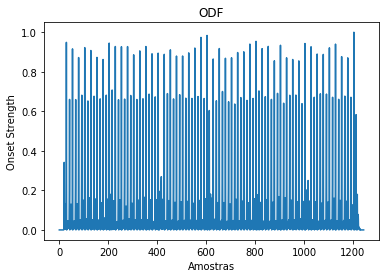

In [7]:
# Here we compute the ODF

# Você precisa selecionar o nível wavelet aqui.
# cA5 = 0 / cD5 = 2 / cD4 = 3 ...
nivel = 5
signal = coeffs[nivel]
sample_rate = 44100
frame_size = 2048

if nivel == 0:
    samplerate_equivalente = sample_rate/2**(len(coeffs)-1)
    frame_size_equivalente = frame_size/2**(len(coeffs)-1)
else:
    samplerate_equivalente = sample_rate/2**(len(coeffs)-nivel)
    frame_size_equivalente = frame_size/2**(len(coeffs)-nivel)

ODF = ODF_SuperFlux(cD4, sample_rate=samplerate_equivalente, frame_size=frame_size_equivalente, hop=frame_size_equivalente/2)

plot_ODF(ODF)

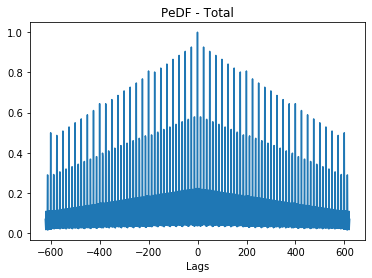

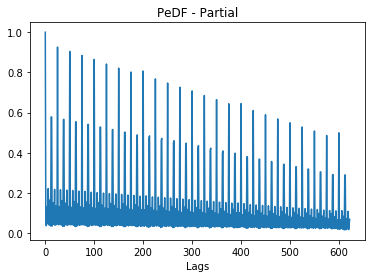

In [6]:
# Here we compute and visualize the PeDF

PeDFa = PeDF(ODF, form = "full")
PeDFb = PeDF(ODF, form = "partial")

plot_PeDF(PeDFa, form="full")
plot_PeDF(PeDFb, form="partial")